In [19]:
libname salary "C:\Users\jinzha\Documents\DrSalary\SAS datafiles";

data long(encoding=utf8);
set salary.drsalary;
format date yymmdd10.;
katben=upcase(katben);
katben=tranwrd(katben, "Ö", "O");
katben=tranwrd(katben, "Ä", "A");
katben=tranwrd(katben, "Å", "A");
do Date = '01JAN2010'd to '01JAN2018'd by 1;
day=day(Date);
if FOM LE DATE LE TOM then output;
end;
keep p_ref katben fom tom date day;
run;

data long2;
set long;
where day=1 and year(date) GT 2012;
run;
proc sql;
create table collapsed as
select distinct
  count(p_ref) as count,
  date,
  katben
from long2
group by katben, date;
quit;


In [93]:
%get collapsed --from SAS

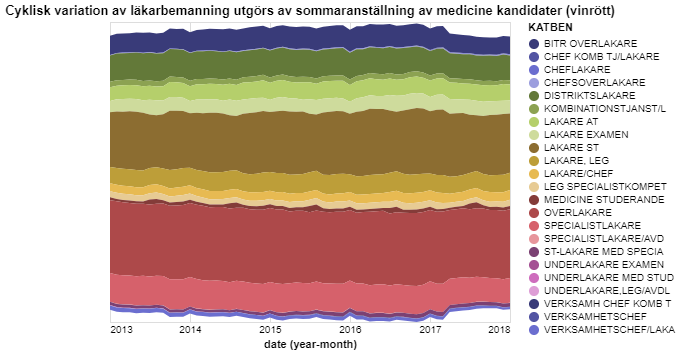

In [97]:
import altair as alt
alt.renderers.enable('notebook')

source = collapsed

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('KATBEN:N',
        scale=alt.Scale(scheme='category20b')
    )
).properties(
    title='Cyklisk variation av läkarbemanning utgörs av sommaranställning av medicine kandidater (vinrött)'
).interactive()